In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi,random

In [6]:
qubit = QuantumRegister(1, 'Q')
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'Q'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

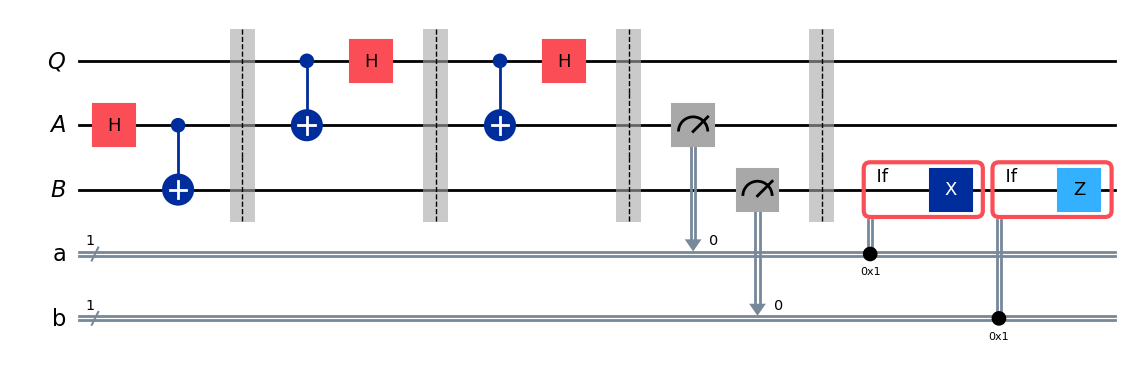

In [7]:
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

protocol.measure(ebit0, a)
protocol.measure(ebit1, b)
protocol.barrier()


with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw('mpl'))

In [10]:
random_gate = UGate(theta=random.uniform(0, 2*pi), phi=random.uniform(0, 2*pi), lam=random.uniform(0, 2*pi)) 

display(random_gate.to_matrix)

<bound method Gate.to_matrix of Instruction(name='u', num_qubits=1, num_clbits=0, params=[3.3633483771007366, 3.462705752533492, 2.8795353028988315])>

In [11]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)



test.append(random_gate, [qubit[0]])
test.barrier()


test = test.compose(protocol)
test.barrier()  


test.append(random_gate.inverse(), ebit1)

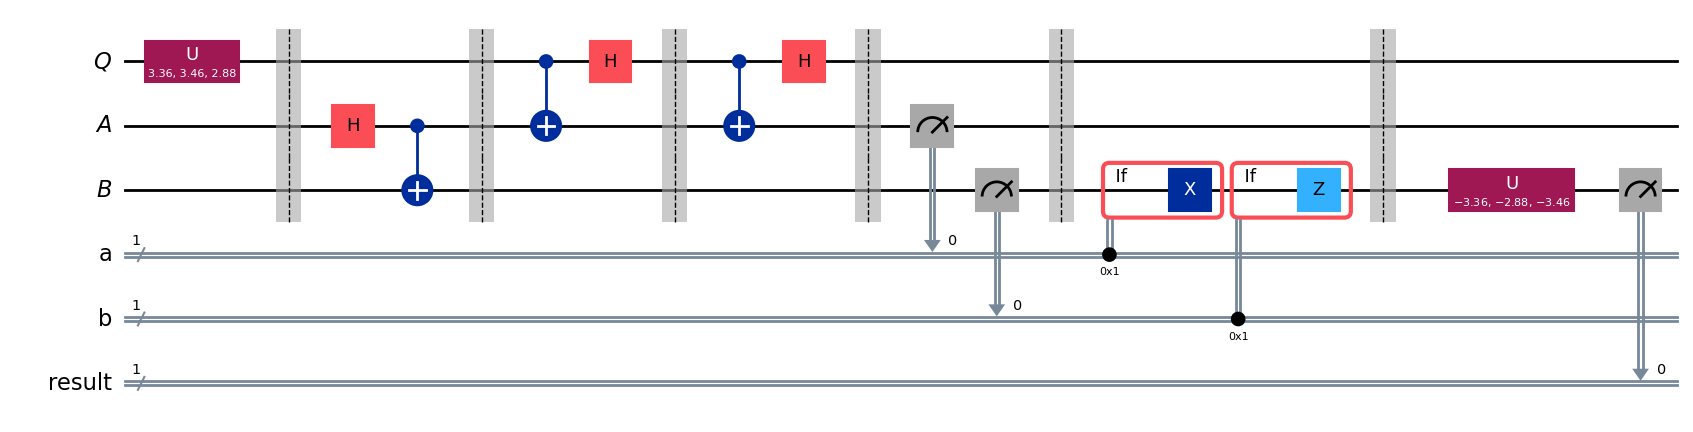

In [12]:
result = ClassicalRegister(1, 'result')
test.add_register(result)
test.measure(ebit1, result)

display(test.draw('mpl'))

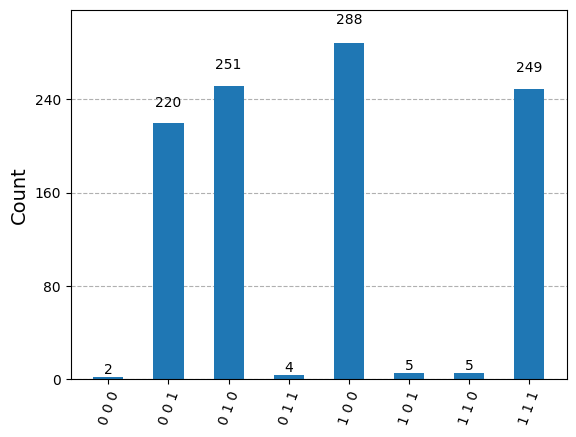

In [13]:
result = AerSimulator().run(test).result()
statists = result.get_counts()
display(plot_histogram(statists))

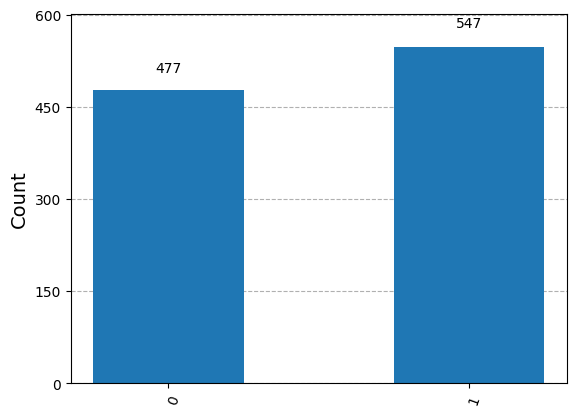

In [15]:
filtered_stats = marginal_distribution(statists, [2])
display(plot_histogram(filtered_stats))